In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla

from IPython.display import Image 

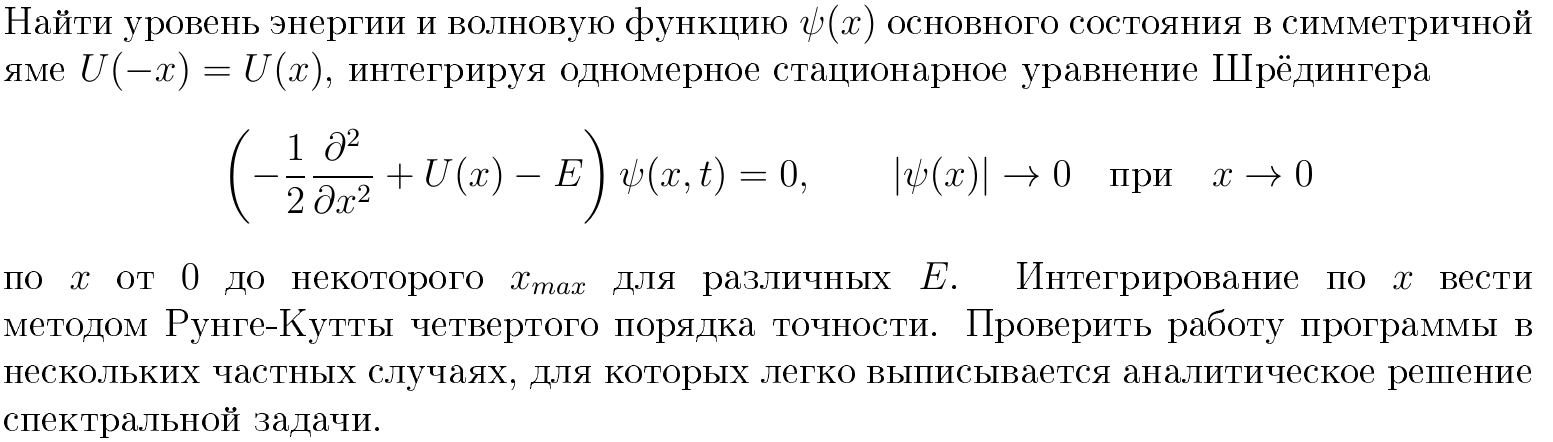

In [28]:
Image("task 12.png")

In [29]:
Xl = 0  # Пределы по Х
Xr = 20

N = 2000    # Число шагов по Х
M = 20      # Число итераций

x = np.linspace(Xl, Xr, N + 1) # Значения Х

h = (Xr-Xl)/N
r = 1/h**2

In [30]:
def TridiagonalMatrix_shifted(id, V, lam):
    a = [0] + [-r/2 for _ in range(N)]
    b = [V[i] + r - lam for i in range(N + 1)]  # Как в методе обратных итераций, но по диагонали вычитаем приближенное значение
    c = [-r/2 for _ in range(N)] + [0]
    d = id.copy()
    
    for i in range(1, N + 1):
        xi = a[i] / b[i - 1]
        b[i] -= xi * c[i - 1]
        d[i] -= xi * d[i - 1]

    y = np.zeros(N + 1)
    y[-1] = d[-1] / b[-1]
    
    for i in range(N - 1, -1, -1):
        y[i] = (d[i] - c[i] * y[i + 1]) / b[i]
    return y

In [31]:
def ReversedIters_shifted(V, lam, iters=M):
    Psi = np.ones(N+1)
    init = lam      # Запоминаем начальное

    for _ in range(iters):
        
        prev_Psi = Psi/sla.norm(Psi)        #  Нормируем
        Psi = TridiagonalMatrix_shifted(prev_Psi, V, init)  # Решаем СЛАУ
        
        lam = init + np.dot(prev_Psi, Psi)/np.dot(Psi, Psi) # Считаем lambda

    return Psi/sla.norm(Psi), lam

### Осциллятор

$$\large U(x) = e^{-\frac{x^2}{2}}$$

Аналитическое решение:
$$\large\psi_n(x)=\frac{1}{\sqrt{2^nn!}}\left(\frac{1}{\pi}\right)^{1/4}H_n(x)e^{-\frac{x^2}{2}}$$

In [32]:
Psi_1 = lambda x:  pow(np.pi, -1 / 4) * pow(2, -1/2)  * x * np.exp(- pow(x, 2) / 2)
Psi_3 = lambda x:  pow(np.pi, -1 / 4) * pow(8*np.math.factorial(3), -1/2) * (8*x**3 - 12*x) * np.exp(- pow(x, 2) / 2)
Psi_5 = lambda x:  pow(np.pi, -1 / 4) * pow(2**5*np.math.factorial(5), -1/2) * (32*x**5 -160*x**3 + 120*x) * np.exp(- pow(x, 2) / 2)
Psi_7 = lambda x:  pow(np.pi, -1 / 4) * pow(2**7*np.math.factorial(7), -1/2) * (128*x**7-1344*x**5+3360*x**3-1680*x) * np.exp(- pow(x, 2) / 2)

Psi_osc = [Psi_1, Psi_3, Psi_5, Psi_7]


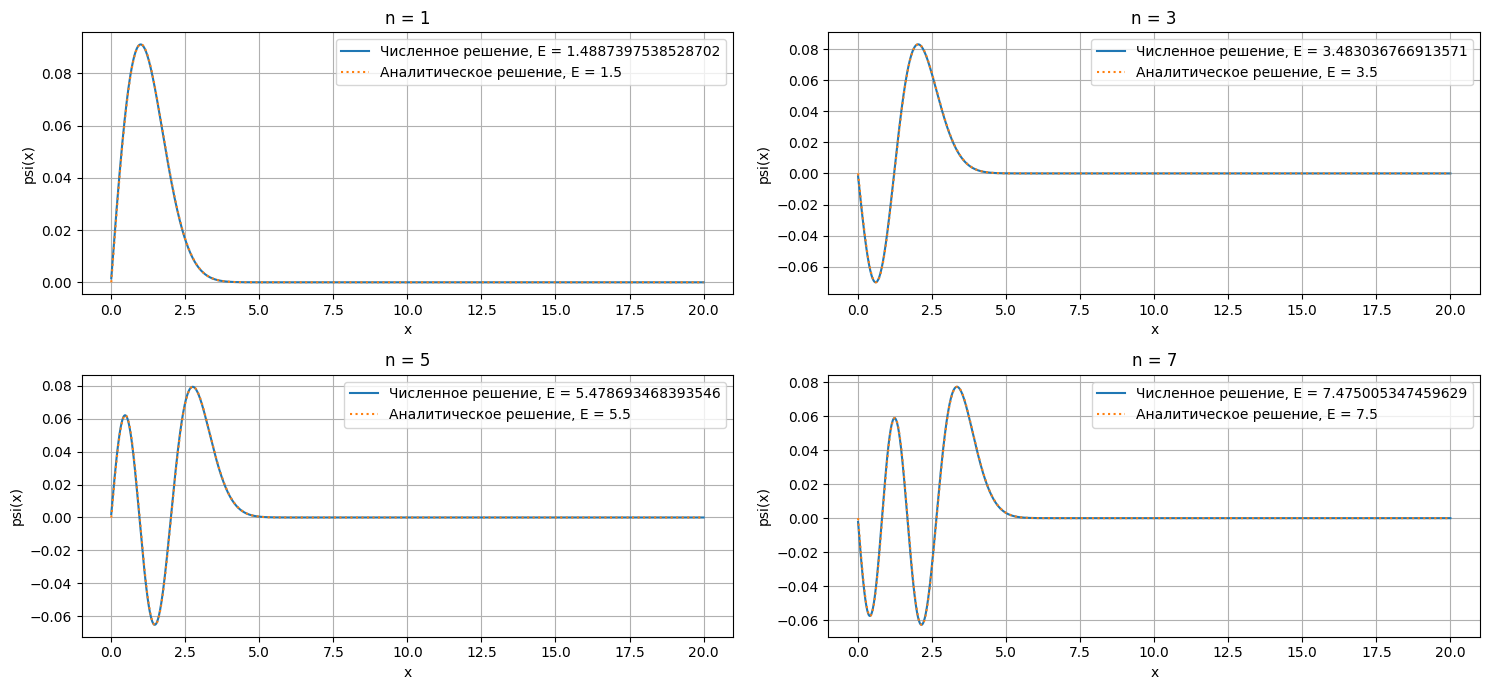

In [33]:
U = lambda x: x**2/2 # Осциллятор
u = U(x)

Ns = [1, 3, 5, 7]
plt.figure(figsize=(15,7))
    
for n in Ns:
    plt.subplot(2, 2, n//2+1)

    E_analytical = n + 1/2
    solution = Psi_osc[n//2]
    psi_analytical = solution(x)
    psi_analytical /= sla.norm(psi_analytical)

    # lam = np.round(E_analytical, 3)
    lam = E_analytical - 1e-3
    psi, E = ReversedIters_shifted(u, lam, iters=100)


    plt.plot(x, psi, label=('Численное решение, Е = ' + str(E)))
    plt.plot(x, psi_analytical, label=('Аналитическое решение, Е = ' + str(E_analytical)), linestyle='dotted')
    plt.xlabel('x')
    plt.ylabel('psi(x)')
    plt.title("n = " + str(n))
    plt.grid()
    plt.legend(loc=1)

plt.tight_layout()

### Нулевой потенциал

$$\large U(x) = 0$$

Решение:
$$ \psi = \frac{1}{\sqrt{\frac{X_{max}}{2} - \frac{\sin(2*\sqrt{2*E}*X_{max})}{4\sqrt{2E}}}} * \sin(\sqrt{2E}x)$$

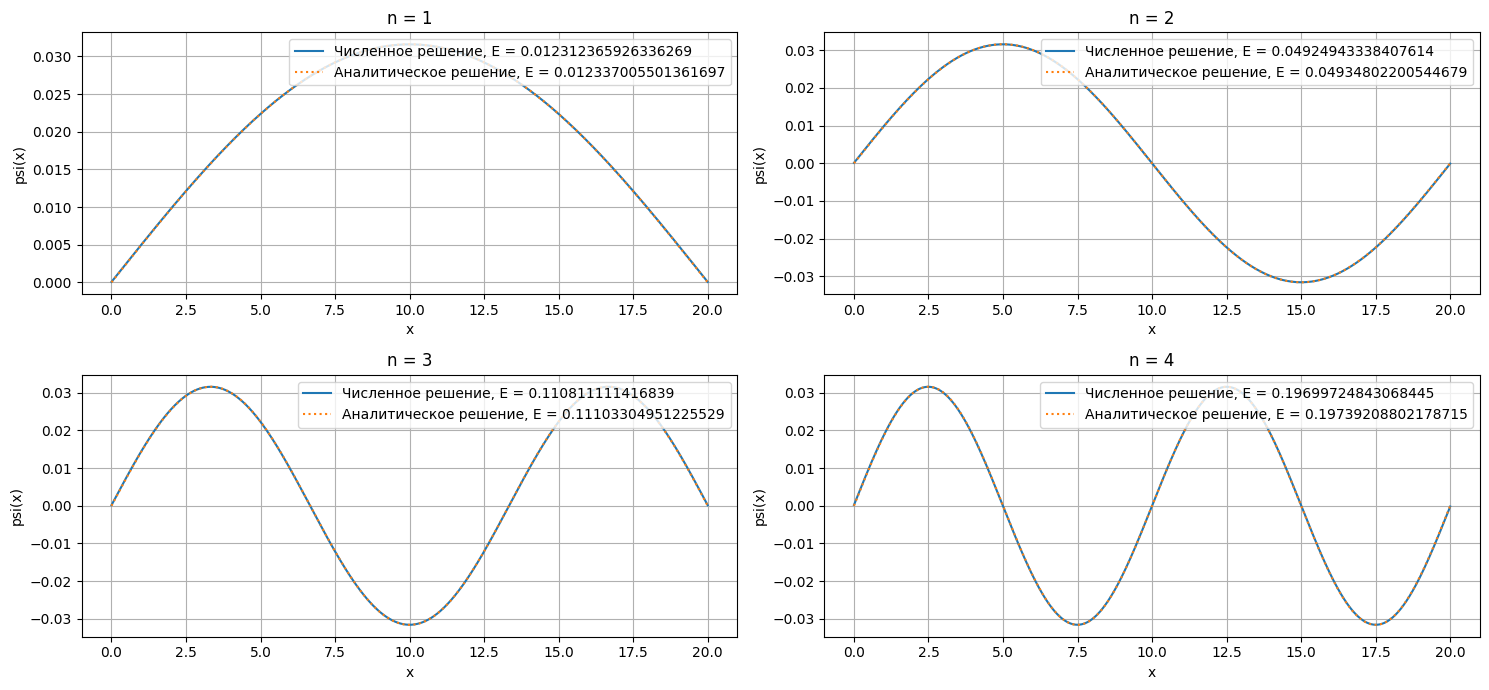

In [34]:
U = lambda x: 0*x
u = U(x)

Ns = [1, 2, 3, 4]
plt.figure(figsize=(15,7))
    
for n in Ns:
    plt.subplot(2, 2, n)
    E_analytical = np.pi**2*n**2/(2*Xr**2)
    alpha = 1/np.sqrt(Xr/2 - np.sin(2*np.sqrt(2*E_analytical)*Xr)/(4*np.sqrt(2*E_analytical)))
    solution = lambda x: alpha*np.sin(np.sqrt(2*E_analytical)*x)
    psi_analytical = solution(x)
    psi_analytical /= sla.norm(psi_analytical)

    # lam = np.round(E_analytical, 3)
    lam = E_analytical - 1e-3
    psi, E = ReversedIters_shifted(u, lam)


    plt.plot(x, psi, label=('Численное решение, Е = ' + str(E)))
    plt.plot(x, psi_analytical, label=('Аналитическое решение, Е = ' + str(E_analytical)), linestyle='dotted')
    plt.xlabel('x')
    plt.ylabel('psi(x)')
    plt.title("n = " + str(n))
    plt.grid()
    plt.legend(loc=1)

plt.tight_layout()

### Барьер

$\large U(x) = 0$, если $\large |x| < a$, иначе $\large-\inf$

Решение:
$$ \psi = \frac{1}{\sqrt{\frac{a}{2} - \frac{\sin(2*\sqrt{2*E}*a)}{4\sqrt{2E}}}} * \sin(\sqrt{2E}x)$$

Считаем численно => вместо inf берем большое число.

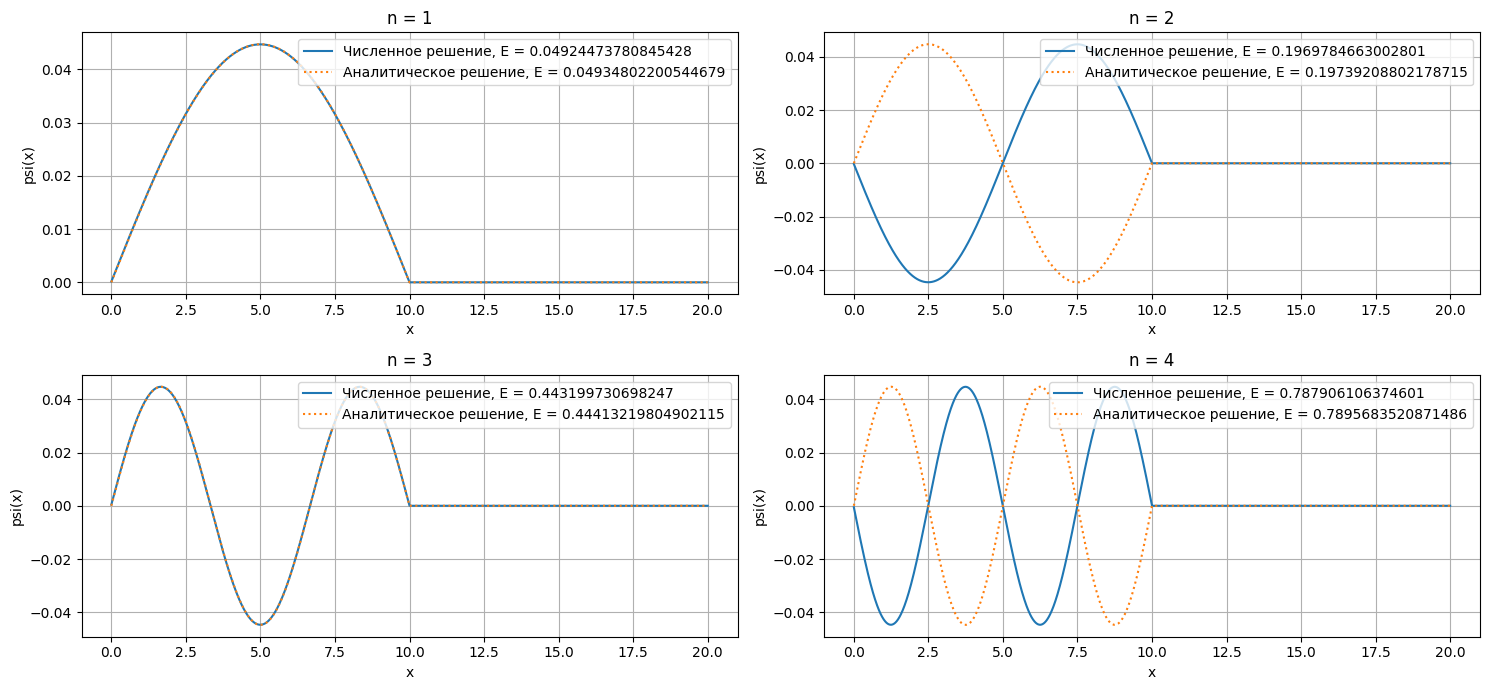

In [35]:
brd = 10
height = 100000

U = lambda x: 0 if abs(x) < brd else height
u = np.vectorize(U)(x)

Ns = [1, 2, 3, 4]
plt.figure(figsize=(15,7))
    
for n in Ns:
    plt.subplot(2, 2, n)

    E_analytical = np.pi**2*n**2/(2*brd**2)
    alpha = 1/np.sqrt(brd/2 - np.sin(2*np.sqrt(2*E_analytical)*brd)/(4*np.sqrt(2*E_analytical)))
    solution = lambda x: alpha*np.sin(np.sqrt(2*E_analytical)*x) if x < brd else 0
    psi_analytical = np.vectorize(solution)(x)
    psi_analytical /= sla.norm(psi_analytical)

    # lam = np.round(E_analytical, 3)
    lam = E_analytical - 1e-3
    psi, E = ReversedIters_shifted(u, lam)


    plt.plot(x, psi, label=('Численное решение, Е = ' + str(E)))
    plt.plot(x, psi_analytical, label=('Аналитическое решение, Е = ' + str(E_analytical)), linestyle='dotted')
    plt.xlabel('x')
    plt.ylabel('psi(x)')
    plt.title("n = " + str(n))
    plt.grid()
    plt.legend(loc=1)

plt.tight_layout()

Численное значение второй производной:
$$
\large
\psi'' \approx \frac{\psi_{i-1}-2\psi_i+\psi_{i+1}}{h^2}
$$

Подставляя в уравнение и делая замену $\large \rho = \frac{1}{h^2}$ получим:
$$ \large
-\frac{\rho}{2}\psi_{i-1}+(\rho+U_i)\psi_i-\frac{\rho}{2}\psi_{i+1}=E\psi_i
$$

Получим систему:
$$
\large\left (\begin{matrix}
 \rho+U_0 & -\frac{\rho}{2} & 0 & 0 & \dots & 0 & 0 & 0 \\
 -\frac{\rho}{2} & \rho+U_1 & -\frac{\rho}{2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{\rho}{2} & \rho+U_2 & -\frac{\rho}{2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & -\frac{\rho}{2} & \rho+U_{n-1} & -\frac{\rho}{2} \\
 0 & 0 & 0 & 0 & \dots & 0 & -\frac{\rho}{2} & \rho+U_n
\end{matrix}\right ) * \left(\begin{matrix} \psi_0 \\ \psi_1 \\ \psi_2 \\ \vdots \\ \psi_{n-1} \\ \psi_n \end{matrix}\right)
= E\overline{\psi}
$$

Пусть теперь у нас имеется некое приближение $\~\lambda_n$ n-го собственного числа $\lambda_n$ для гамильтониана $\^H$. Проведем итерационный процесс следующего вида:
$$(H-\~\lambda I)\Psi^{(s+1)} = \Psi^{(s)}$$
При этом, для нахождения $\Psi^{(s+1)}$ на каждом шаге будем решать СЛАУ методом прогонки.

Собственными числами матрицы $(H-\~\lambda_n I)$ являются $(\lambda - \~\lambda_n)$, где $\lambda$ - собственные значения матрицы $H$. При этом собственное значение $(\lambda_n-\~\lambda_n)$ будет наименьшим. Следовательно, метод обратных итераций сойдется к требуемому нам собственному значению $(\lambda_n-\~\lambda_n)$.

Тогда, для решения задачи, мы получим следующие итерации:
$$(H-\~\lambda I)\Psi^{(s+1)} = \Psi^{(s)}; \\
\ \\
\lambda_n^{(s)} = \~\lambda_n + \frac{(\Psi^{(s+1)}, \Psi^{(s)})}{(\Psi^{(s)}, \Psi^{(s)})}
$$